<a href="https://colab.research.google.com/github/AyeshW/Classifer-Server/blob/master/Classifer_General_Classifier_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data input and pre-processing


In [0]:
import pandas as pd

In [0]:
from google.colab import drive, files
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
path = '/content/gdrive/My Drive/Colab Notebooks/bbc-text.csv'
df = pd.read_csv(path)
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [0]:
df['category_id'] = df['category'].factorize()[0]

In [0]:
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
print(id_to_category)
df

{0: 'tech', 1: 'business', 2: 'sport', 3: 'entertainment', 4: 'politics'}


,category,text,category_id
0,tech,tv future in the hands of viewers with home th...,0
1,business,worldcom boss left books alone former worldc...,1
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,3
5,politics,howard hits back at mongrel jibe michael howar...,4
6,politics,blair prepares to name poll date tony blair is...,4
7,sport,henman hopes ended in dubai third seed tim hen...,2
8,sport,wilkinson fit to face edinburgh england captai...,2
9,entertainment,last star wars not for children the sixth an...,3


## Data exploration

In [0]:
df.sample(5, random_state=0)

,category,text,category_id
384,politics,drive to save festive holidays efforts are b...,4
1983,sport,officials respond in court row australian tenn...,2
985,sport,cup holders man utd visit everton holders manc...,2
1386,sport,adriano s chelsea link rejected adriano s agen...,2
1294,sport,o driscoll/gregan lead aid stars ireland s bri...,2


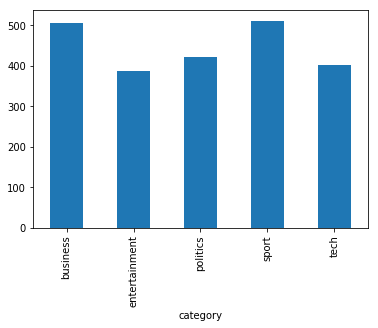

In [0]:
df.groupby('category').text.count().plot.bar(ylim=0)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id
features

array([[0.        , 0.02387836, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03120819, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.03857387, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02753307, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

features matrix contains a 2D array representing a (number_of_samples x number_of_features) matrix

In [0]:
from sklearn.feature_selection import chi2
import numpy as np

N = 4
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

# 'business':
  . Most correlated unigrams:
       . oil
       . bank
       . growth
       . shares
  . Most correlated bigrams:
       . oil prices
       . analysts said
       . economic growth
       . stock market
  . Most correlated trigrams:
       . gross domestic product
       . high oil prices
       . london stock exchange
       . securities exchange commission
# 'entertainment':
  . Most correlated unigrams:
       . awards
       . singer
       . actor
       . film
  . Most correlated bigrams:
       . million dollar
       . los angeles
       . film festival
       . box office
  . Most correlated trigrams:
       . best supporting actress
       . best supporting actor
       . berlin film festival
       . million dollar baby
# 'politics':
  . Most correlated unigrams:
       . party
       . blair
       . election
       . labour
  . Most correlated bigrams:
       . general election
       . prime minister
       . tony blair
       . mr blair
  . Most correl

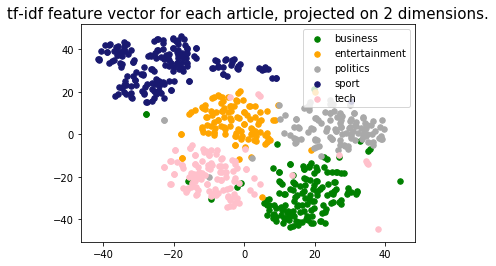

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:,0], points[:,1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

## Model evaluation and training



In [0]:
#hyperparameter search
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

rndm_forst = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
multi = MultinomialNB(),
bernli = BernoulliNB(),
logistic = LogisticRegression(solver='liblinear'),
sgd = SGDClassifier(),
linear = LinearSVC()

models = [
    rndm_forst,
    multi,
    bernli,
    logistic,
    sgd,
    linear
]

loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
eta0 = [1, 10, 100]
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver,
                  loss=loss,
                  alpha=alpha,
                  learning_rate=learning_rate,
                  eta0=eta0)

grid = GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=1,
                    n_jobs=-1)
grid.fit(X_train, y_train)

print("Model: logistic")
print("Best score: ",grid.cv_results.keys())
#print("Best param: ",grid_result.best_param_)

### Model evaluation


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    BernoulliNB(),
    LogisticRegression(random_state=0),
    SGDClassifier(),
    LinearSVC()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
print(cv_df)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

                model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.810690
1   RandomForestClassifier         1  0.828829
2   RandomForestClassifier         2  0.871622
3   RandomForestClassifier         3  0.824324
4   RandomForestClassifier         4  0.849099
5            MultinomialNB         0  0.973274
6            MultinomialNB         1  0.977477
7            MultinomialNB         2  0.981982
8            MultinomialNB         3  0.959459
9            MultinomialNB         4  0.975225
10             BernoulliNB         0  0.964365
11             BernoulliNB         1  0.966216
12             BernoulliNB         2  0.979730
13             BernoulliNB         3  0.952703
14             BernoulliNB         4  0.972973
15      LogisticRegression         0  0.977728
16      LogisticRegression         1  0.981982
17      LogisticRegression         2  0.988739
18      LogisticRegression         3  0.972973
19      LogisticRegression         4  0.988739
20           

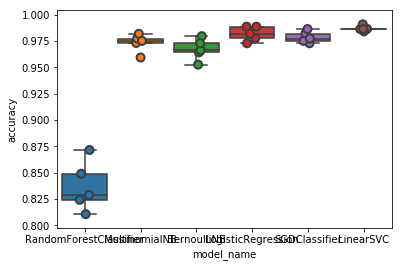

In [0]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [0]:
cv_df.groupby('model_name').accuracy.mean()

model_name
BernoulliNB               0.967197
LinearSVC                 0.986967
LogisticRegression        0.982032
MultinomialNB             0.973484
RandomForestClassifier    0.836913
SGDClassifier             0.978869
Name: accuracy, dtype: float64

**LinearSVC** model has the highest mean accuracy over the dataset

### Model interpretation



In [0]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
#y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 15.0, 'Predicted')

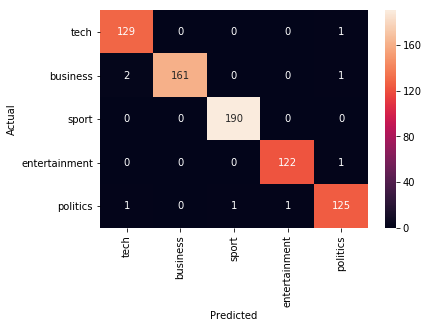

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [0]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['category_id', 'text']])
      print('')

'business' predicted as 'tech' : 2 examples.


,category_id,text
1748,1,id theft surge hits us consumers almost a quar...
159,1,orange colour clash set for court a row over t...


In [0]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [0]:
from sklearn.feature_selection import chi2

N = 5
for category, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  trigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 3][:N]
  print("# '{}':".format(category))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))
  print("  . Top trigrams:\n       . {}".format('\n       . '.join(trigrams)))  

# 'business':
  . Top unigrams:
       . bank
       . firm
       . shares
       . economic
       . company
  . Top bigrams:
       . chief executive
       . mr glazer
       . stock market
       . economic growth
       . analysts said
  . Top trigrams:
       . world trade organisation
       . chief financial officer
       . securities exchange commission
       . president viktor yushchenko
       . trade organisation wto
# 'entertainment':
  . Top unigrams:
       . film
       . singer
       . tv
       . music
       . star
  . Top bigrams:
       . box office
       . los angeles
       . new york
       . ticket sales
       . phonographic industry
  . Top trigrams:
       . british phonographic industry
       . strictly come dancing
       . uk film council
       . celebrity big brother
       . phonographic industry bpi
# 'politics':
  . Top unigrams:
       . party
       . labour
       . secretary
       . government
       . blair
  . Top bigrams:
       . mr bl

In [0]:
df[df.text.str.lower().str.contains('news website')].category.value_counts()

tech             69
politics          8
entertainment     7
business          1
Name: category, dtype: int64

In [0]:
texts = ["Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!",
         "An amended draft bill on the regulation of Islamic institutes including Madrasas will be presented to the Cabinet after consultations with the Attorney General’s Department and the Muslim Religious Affairs Ministry, Prime Minister Ranil Wickremesinghe said. The Prime Minister said the country does not need Sharia universities and degree awarding institutions should be open to all under the Universities Act.",
         "The race for Lille star Nicolas Pepe is heating up with Manchester United and Paris Saint-Germain among the clubs interested. The 23-year-old, who has also attracted interest from Arsenal in the past, enjoyed an outstanding season in Ligue 1, scoring 20 goals and adding 11 assists to help Lille qualify for the Champions League. The French club are likely to demand close to £70m for his signature"]
text_features = tfidf.transform(texts)
print(text_features)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")
print(id_to_category)

  (0, 13064)	0.35481994610072015
  (0, 12675)	0.5525997591632623
  (0, 11365)	0.38850258688533096
  (0, 10456)	0.32189764294116807
  (0, 6045)	0.2817225102107222
  (0, 3990)	0.48457856609086836
  (1, 13518)	0.26530405174747435
  (1, 12065)	0.4878943500612208
  (1, 8124)	0.5407128396486673
  (1, 7147)	0.3831581509320543
  (1, 5823)	0.34073438607684314
  (1, 2256)	0.3691780029510874
  (2, 12266)	0.3635303435415327
  (2, 11954)	0.5914109553651851
  (2, 9096)	0.16789084628272502
  (2, 8684)	0.5424178378020279
  (2, 6032)	0.37430754223422524
  (2, 5912)	0.2357290563206651
  (3, 13890)	0.36329956785917283
  (3, 12773)	0.3981975968910693
  (3, 12772)	0.33494542911132796
  (3, 12767)	0.20669097083177465
  (3, 11148)	0.33823630216956707
  (3, 9096)	0.10469194605564243
  (3, 4358)	0.389322432500167
  :	:
  (6, 9208)	0.19731692726062258
  (6, 8229)	0.16640285948718592
  (6, 8227)	0.14779517018811075
  (6, 7826)	0.1112990504227622
  (6, 7661)	0.13962256088540342
  (6, 6949)	0.15849206928948162
  (

In [0]:
import pickle
save_model = open("/content/gdrive/My Drive/Colab Notebooks/generalClf.pickle","wb")
pickle.dump(model, save_model)
save_model.close()

In [0]:
save_tfidf = open("/content/gdrive/My Drive/Colab Notebooks/tfidf.pickle","wb")
pickle.dump(tfidf, save_tfidf)
save_tfidf.close()

In [0]:
save_id_map = open("/content/gdrive/My Drive/Colab Notebooks/gen_id_map.pickle","wb")
pickle.dump(id_to_category, save_id_map)
save_id_map.close()